In [1]:
!wget "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"

--2022-02-06 09:42:29--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.201.212.130, 2600:1402:6800:283::e59, 2600:1402:6800:297::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.201.212.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   194MB/s    in 4.1s    

2022-02-06 09:42:33 (194 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [2]:
!unzip -q "/content/kagglecatsanddogs_3367a.zip"

In [3]:
!ls "PetImages/"

Cat  Dog


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib 
import os
from tqdm import tqdm #graphical progress bar

In [5]:
len(os.listdir("PetImages/Dog"))

12501

In [6]:
len(os.listdir("PetImages/Cat"))

12501

In [7]:
DataPath = pathlib.Path("PetImages")
all_paths = DataPath.glob("*/*.jpg")
all_paths

<generator object Path.glob at 0x7f51b878eed0>

In [8]:
all_paths = list(all_paths)
all_paths[:10]

[PosixPath('PetImages/Dog/121.jpg'),
 PosixPath('PetImages/Dog/2410.jpg'),
 PosixPath('PetImages/Dog/8085.jpg'),
 PosixPath('PetImages/Dog/3817.jpg'),
 PosixPath('PetImages/Dog/611.jpg'),
 PosixPath('PetImages/Dog/10488.jpg'),
 PosixPath('PetImages/Dog/3339.jpg'),
 PosixPath('PetImages/Dog/10130.jpg'),
 PosixPath('PetImages/Dog/1291.jpg'),
 PosixPath('PetImages/Dog/5987.jpg')]

In [9]:
all_paths = list(map(lambda x : str(x) , all_paths))
all_paths[:10]

['PetImages/Dog/121.jpg',
 'PetImages/Dog/2410.jpg',
 'PetImages/Dog/8085.jpg',
 'PetImages/Dog/3817.jpg',
 'PetImages/Dog/611.jpg',
 'PetImages/Dog/10488.jpg',
 'PetImages/Dog/3339.jpg',
 'PetImages/Dog/10130.jpg',
 'PetImages/Dog/1291.jpg',
 'PetImages/Dog/5987.jpg']

In [10]:
from random import shuffle

shuffle(all_paths)
all_paths[:10]

['PetImages/Cat/7636.jpg',
 'PetImages/Cat/6687.jpg',
 'PetImages/Dog/4541.jpg',
 'PetImages/Cat/7278.jpg',
 'PetImages/Cat/6619.jpg',
 'PetImages/Dog/5132.jpg',
 'PetImages/Dog/1451.jpg',
 'PetImages/Cat/9986.jpg',
 'PetImages/Dog/4137.jpg',
 'PetImages/Dog/593.jpg']

In [11]:
def TestImageQuality(all_paths):
    new_all_paths = []
    for path in tqdm(all_paths):
        try :
            image = tf.io.read_file(path)
            image = tf.io.decode_jpeg(image , channels = 3)
        except :
            continue
        new_all_paths.append(path)
    return new_all_paths

all_paths = TestImageQuality(all_paths)
all_paths[:10]

100%|██████████| 25000/25000 [00:44<00:00, 565.01it/s]


['PetImages/Cat/7636.jpg',
 'PetImages/Cat/6687.jpg',
 'PetImages/Dog/4541.jpg',
 'PetImages/Cat/7278.jpg',
 'PetImages/Cat/6619.jpg',
 'PetImages/Dog/5132.jpg',
 'PetImages/Dog/1451.jpg',
 'PetImages/Cat/9986.jpg',
 'PetImages/Dog/4137.jpg',
 'PetImages/Dog/593.jpg']

In [12]:
len(all_paths)

24824

In [13]:
# Getting their respective labels 
def get_label(image_path):
    return image_path.split("/")[-2]

all_labels = list(map(lambda x : get_label(x) , all_paths))
all_labels[:10]

['Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Dog', 'Cat', 'Dog', 'Dog']

In [14]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
all_labels = Le.fit_transform(all_labels)

all_labels[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [15]:
from sklearn.model_selection import train_test_split 

Train_paths , Val_paths , Train_labels , Val_labels = train_test_split(all_paths , all_labels)

In [16]:
Train_paths[:10] , Train_labels[:10]

(['PetImages/Dog/3995.jpg',
  'PetImages/Cat/10398.jpg',
  'PetImages/Cat/2239.jpg',
  'PetImages/Dog/11707.jpg',
  'PetImages/Dog/3768.jpg',
  'PetImages/Dog/10870.jpg',
  'PetImages/Cat/11702.jpg',
  'PetImages/Dog/5887.jpg',
  'PetImages/Cat/3986.jpg',
  'PetImages/Cat/220.jpg'],
 array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0]))

In [17]:
# Function used to decode jpeg into Tensor

def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

In [18]:
# Define IMAGE SIZE and BATCH SIZE 
IMG_SIZE = 224 
BATCH_SIZE = 128

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)          
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

In [19]:
# Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()
    return dataset

In [20]:
# Creating Train Dataset object and Verifying it
%time train_dataset = get_dataset(Train_paths , Train_labels)

image , label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 544 ms, sys: 18.6 ms, total: 563 ms
Wall time: 594 ms
(128, 224, 224, 3)
(128,)


Cat


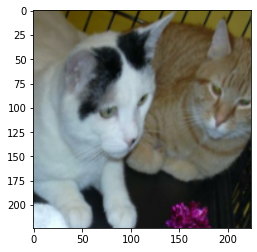

In [21]:
# View a sample Training Image
print(Le.inverse_transform(label)[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [23]:
%time val_dataset = get_dataset(Val_paths , Val_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 23.5 ms, sys: 3.06 ms, total: 26.6 ms
Wall time: 25.6 ms
(128, 224, 224, 3)
(128,)


Dog


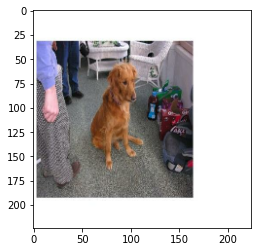

In [24]:
# View a sample Training Image
print(Le.inverse_transform(label)[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [25]:
# Model part 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization , GlobalMaxPool2D

model = Sequential()

# Block 1 
model.add(Conv2D(input_shape=(224 , 224 , 3),  padding='same',filters=32, kernel_size=(7, 7)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(filters=64,  padding='valid', kernel_size=(5, 5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 3 
model.add(Conv2D(filters=128, padding='valid', kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

# Block 4 
model.add(Conv2D(filters=256, padding='valid', kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256 , kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(GlobalMaxPool2D())

model.add(Dense(units=256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.add(Activation('sigmoid'))

In [26]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      4736      
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 64)     

In [27]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [28]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=10,
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

Epoch 1/10
145/145 [==============================] - 110s 661ms/step - loss: 0.7982 - accuracy: 0.6128 - val_loss: 0.6827 - val_accuracy: 0.5874
Epoch 2/10
145/145 [==============================] - 97s 667ms/step - loss: 0.5887 - accuracy: 0.6886 - val_loss: 0.6746 - val_accuracy: 0.5623
Epoch 3/10
145/145 [==============================] - 96s 666ms/step - loss: 0.5673 - accuracy: 0.7021 - val_loss: 0.6009 - val_accuracy: 0.6792
Epoch 4/10
145/145 [==============================] - 97s 669ms/step - loss: 0.5236 - accuracy: 0.7436 - val_loss: 0.6679 - val_accuracy: 0.6154
Epoch 5/10
145/145 [==============================] - 96s 668ms/step - loss: 0.5019 - accuracy: 0.7540 - val_loss: 0.6234 - val_accuracy: 0.6619
Epoch 6/10
145/145 [==============================] - 97s 673ms/step - loss: 0.4612 - accuracy: 0.7825 - val_loss: 0.4986 - val_accuracy: 0.7629
Epoch 7/10
145/145 [==============================] - 97s 674ms/step - loss: 0.4169 - accuracy: 0.8053 - val_loss: 0.5048 - val_a

In [29]:
# Evaluating the loaded model
loss, acc = model.evaluate(val_dataset)

print(" Testing Acc : " , acc)
print(" Testing Loss : " , loss)

49/49 [==============================] - 12s 221ms/step - loss: 0.4110 - accuracy: 0.8023
 Testing Acc :  0.8022881150245667
 Testing Loss :  0.4109971225261688
